In dit experiment gaan we de gistcellen detecteren in een beeld met als doel om die ook te tellen. Hiervoor gebruiken we een aantal Python bibliotheken die we eerst moeten initialiseren. 
Alle code op deze pagina is echte python code die live kan worden uitgevoerd. Je kan ook een aantal parameters veranderen en zien wat het effect daarvan is.
Druk na elke wijziging op de 'play' knop bovenaan, of gebruik Shift-Enter.

In [1]:
import matplotlib.pyplot as plt
import matplotlib
# for creating a responsive plot
%matplotlib widget
import numpy as np

from skimage import data

We laden een microscopiebeeld in dat jullie in het microscopielabo hebben onderzocht en laten het zien. Het is een goede gewoonte om altijd je data te inspecteren voor je verder gaat.

image has size (512, 512) and looks like this:


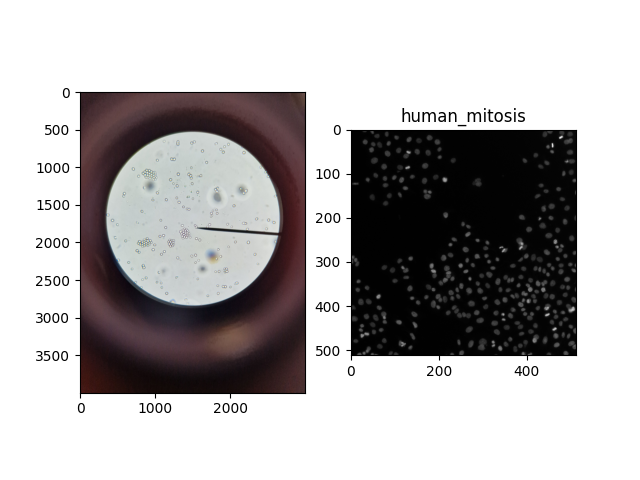

In [7]:
# code block to load and display images
# -------------------------------------
import imageio.v2 as iio
import numpy as np

# load test image
name = 'human_mitosis'
caller = getattr(data, name)
image = caller()

# load image (taken from microscopy lab) and convert to greyvalues
#name = 'gistcellen'
#color_image = iio.imread("gistcellen_uit_microscopie_labo.jpg")
#image = np.mean(color_image, axis=2)

# display images (original in color and in greyvalues)
print('image has size ' + str(image.shape) + ' and looks like this:')
f = plt.figure()
f.add_subplot(1,2, 1)
plt.imshow(color_image)
f.add_subplot(1,2, 2)
plt.imshow(image, cmap=plt.cm.gray)
plt.title(name)
plt.show()

In dit geval gaat het over een kleurenbeeld dat we hebben omgezet in een grijswaardenbeeld. Je kan de afmeting  zien boven het beeld. Elke pixelwaarde heeft een bereik van 0 tot 255 (8 bits of 1 byte), dat kan je interaktief onderzoeken door de muiscursos over het beeld te bewegen.
De cellen worden weergegeven door heldere ellipsvormige objecten op een donkere achtergrond. Om beter te begrijpen welke grijdwaarden er voorkomen in het beeld kan je ook inzoomen.in te zien welke grijswaarden voorkomen in het beeld stellen we een histogram op met de verdeling van de grijswaarden over het beeld.

Een andere manier om naar een grijswaardenbeeld te kijken is om het te beschouwen als een landschap waarin de grijswaarde de hoogte voorstelt. Dat doen we als volgt.

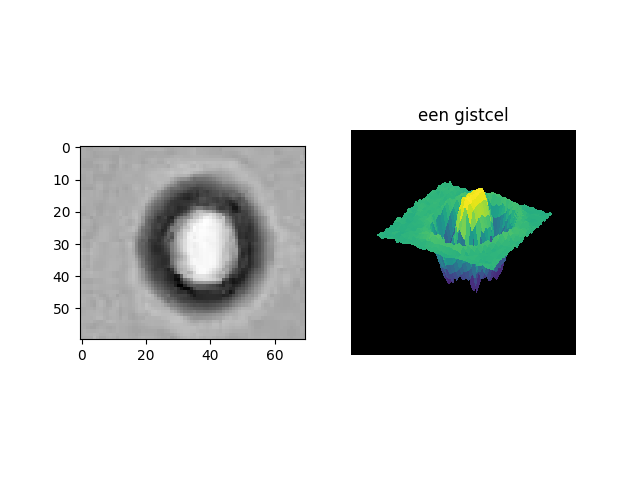

In [3]:
# code block show as landscape
# ------------------------------
from matplotlib import cm

cell = image[1770:1830, 1100:1170]

f2 = plt.figure()
# show greyvalue image of cell left
f2.add_subplot(1,2, 1)
plt.imshow(cell, cmap=plt.cm.gray)

# and landscape image of the same cell right
ax = f2.add_subplot(1,2, 2, projection='3d')

m, n=cell.shape
X, Y = np.meshgrid(np.arange(n), np.arange(m))

ax.plot_surface(X, Y, cell, cmap=cm.viridis, antialiased=False)
ax.axis("off")
ax.set_facecolor('black')
plt.title("een gistcel")
plt.show()

We kunnen cellen detecteren door de afbeelding te vergelijken met de afbeelding van een enkele cel.

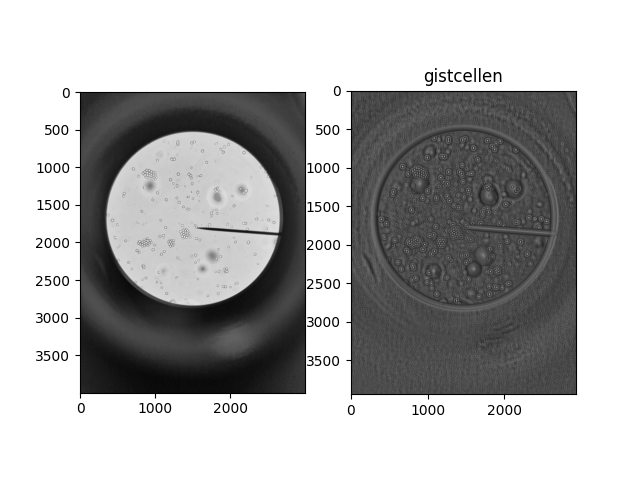

In [4]:
from skimage.feature import match_template

# calculate template matching from 'cell' to entire image
result = match_template(image, cell)

f3 = plt.figure()
f3.add_subplot(1,2, 1)
plt.imshow(image, cmap=plt.cm.gray)
f3.add_subplot(1,2, 2)
plt.imshow(result, cmap=plt.cm.gray)
plt.title(name)
plt.show()

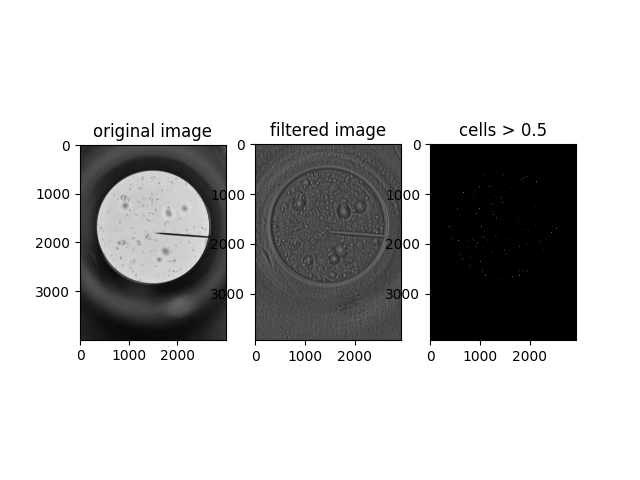

In [5]:
# code block to show thresholded image
# ------------------------------------
threshold_value = 0.5

thresholded_result  = result > threshold_value

# show original image, filtered image and thresholded result side-by-side
f3 = plt.figure()
f3.add_subplot(1,3, 1)
plt.imshow(image, cmap=plt.cm.gray)
plt.title('original image')
f3.add_subplot(1,3, 2)
plt.imshow(result, cmap=plt.cm.gray)
plt.title('filtered image')
f3.add_subplot(1,3, 3)
plt.imshow(result > threshold_value, cmap=plt.cm.gray)
plt.title('cells > ' + str(threshold_value))
plt.show()

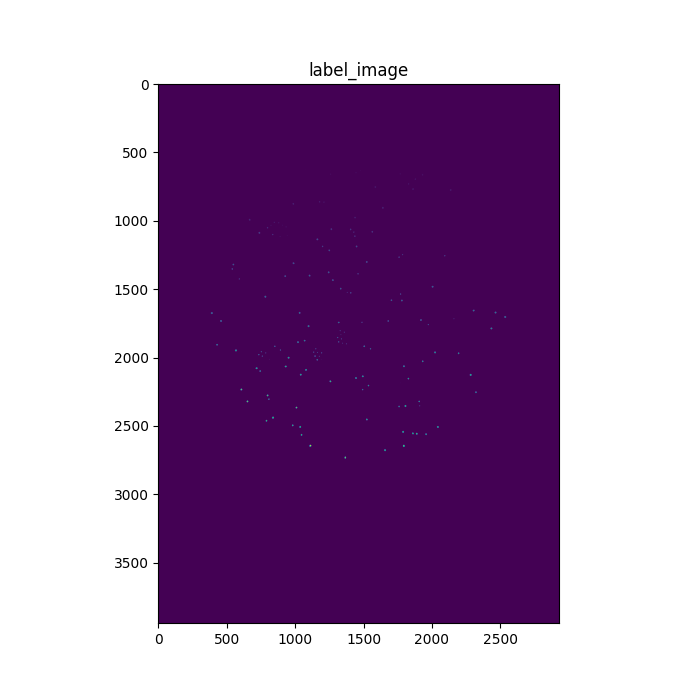

Maximum label value is 147


In [6]:
# code block to label all the blobs and count them
# ---------------------------------------------------------
from skimage.measure import label, regionprops

label_image = label(thresholded_result)
plt.figure(figsize=(7,7))
plt.imshow(label_image)
plt.title('label_image')
plt.show()
print('Maximum label value is '+ str(label_image.max()))